<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Data_Developer_Salary_in_2024%F0%9F%92%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [133]:
df = pd.read_csv('/content/Dataset salary 2024.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [134]:
df.shape

(16534, 11)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,16534.0,2023.226866,0.713558,2020.0,2023.0,2023.0,2024.0,2024.0
salary,16534.0,163726.962683,340205.744183,14000.0,101763.0,142200.0,187200.0,30400000.0
salary_in_usd,16534.0,149686.777973,68505.293156,15000.0,101125.0,141300.0,185900.0,800000.0
remote_ratio,16534.0,32.003750,46.245158,0.0,0.0,0.0,100.0,100.0


In [137]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [138]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [139]:
df.nunique()

,0
work_year,5
experience_level,4
employment_type,4
job_title,155
salary,2560
salary_currency,23
salary_in_usd,2939
employee_residence,88
remote_ratio,3
company_location,77


In [140]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M


In [141]:
numerical_col = ['work_year','salary','salary_in_usd','remote_ratio']

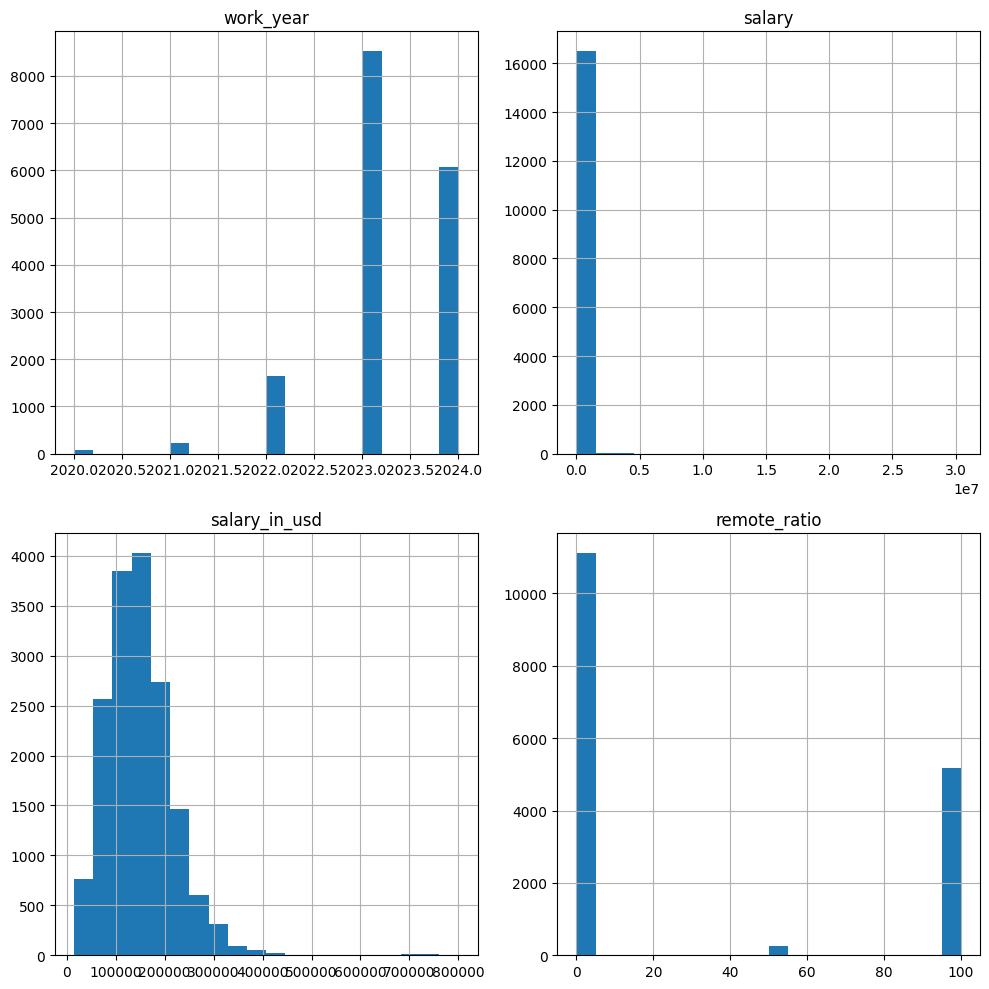

In [142]:
df[numerical_col].hist(figsize=(10,10),bins=20)
plt.tight_layout()
plt.show()

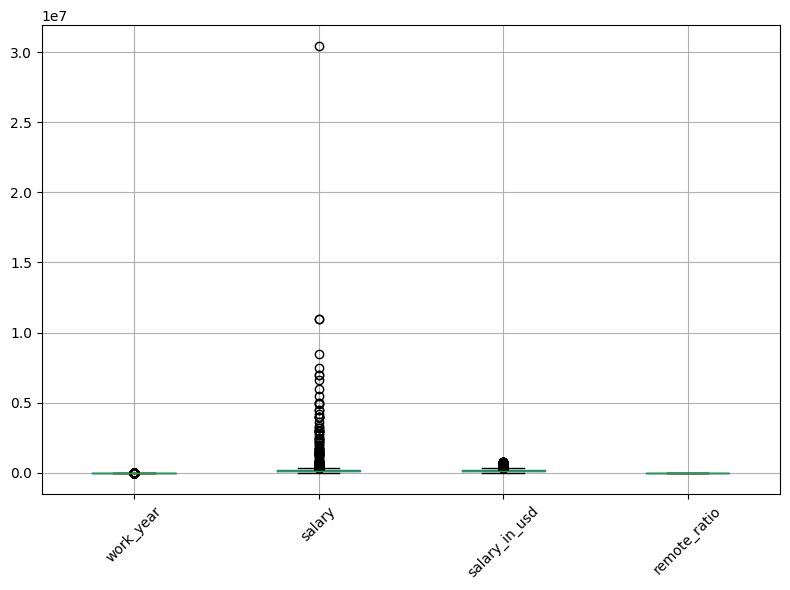

In [143]:
plt.figure(figsize=(8,6))
df[numerical_col].boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# used to rubust Scaler

In [144]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M


In [145]:
categorical_col = ['experience_level','employment_type','job_title',
                   'company_size','employee_residence','salary_currency']

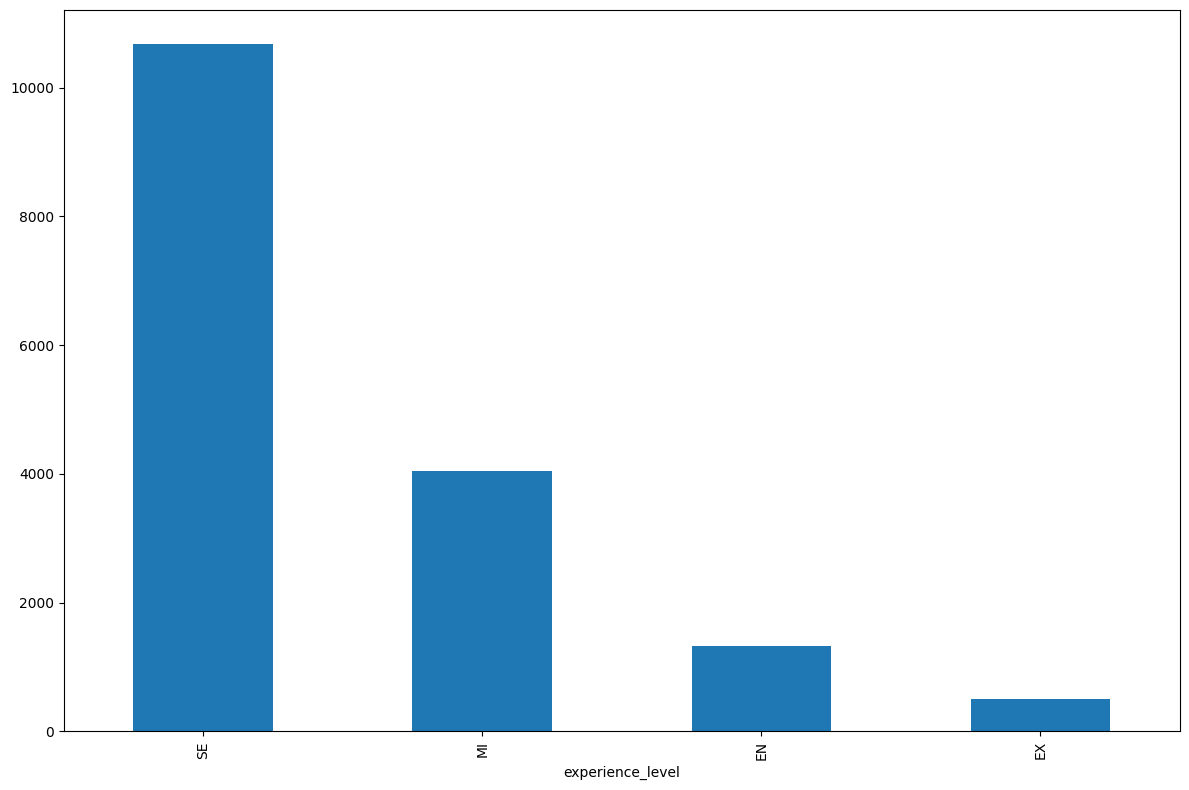

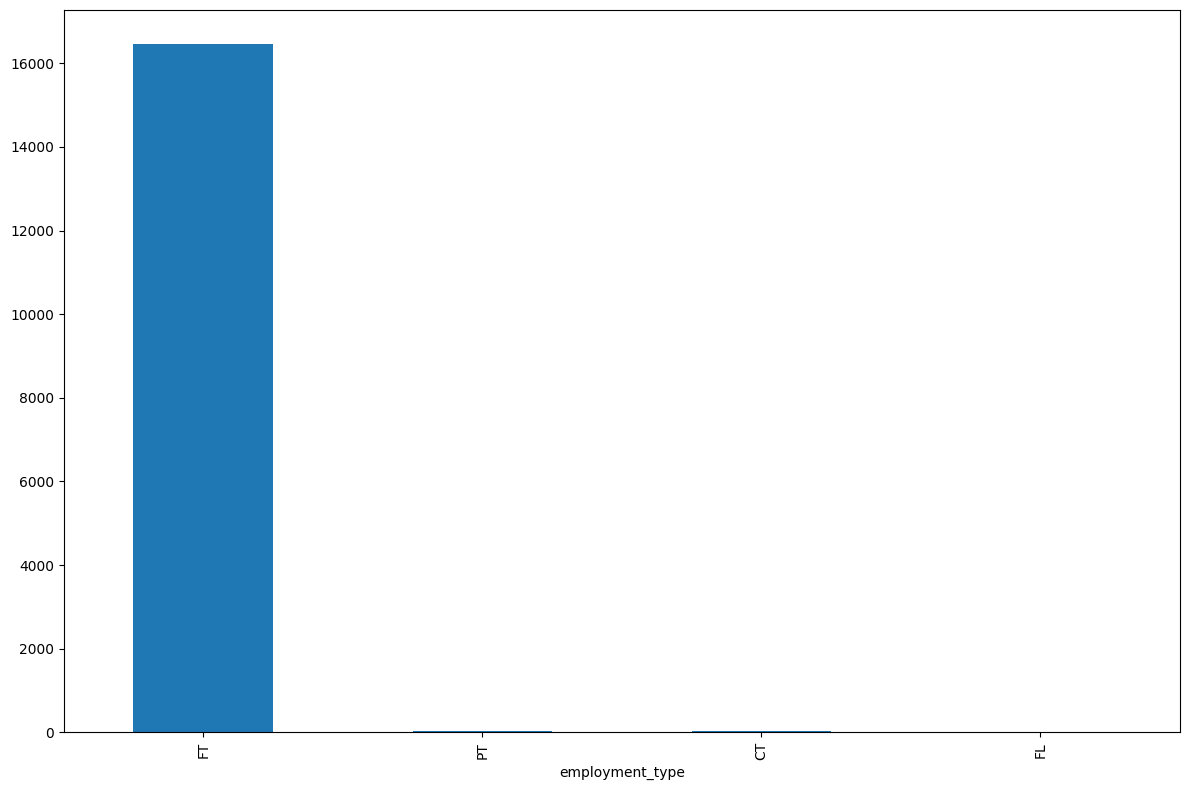

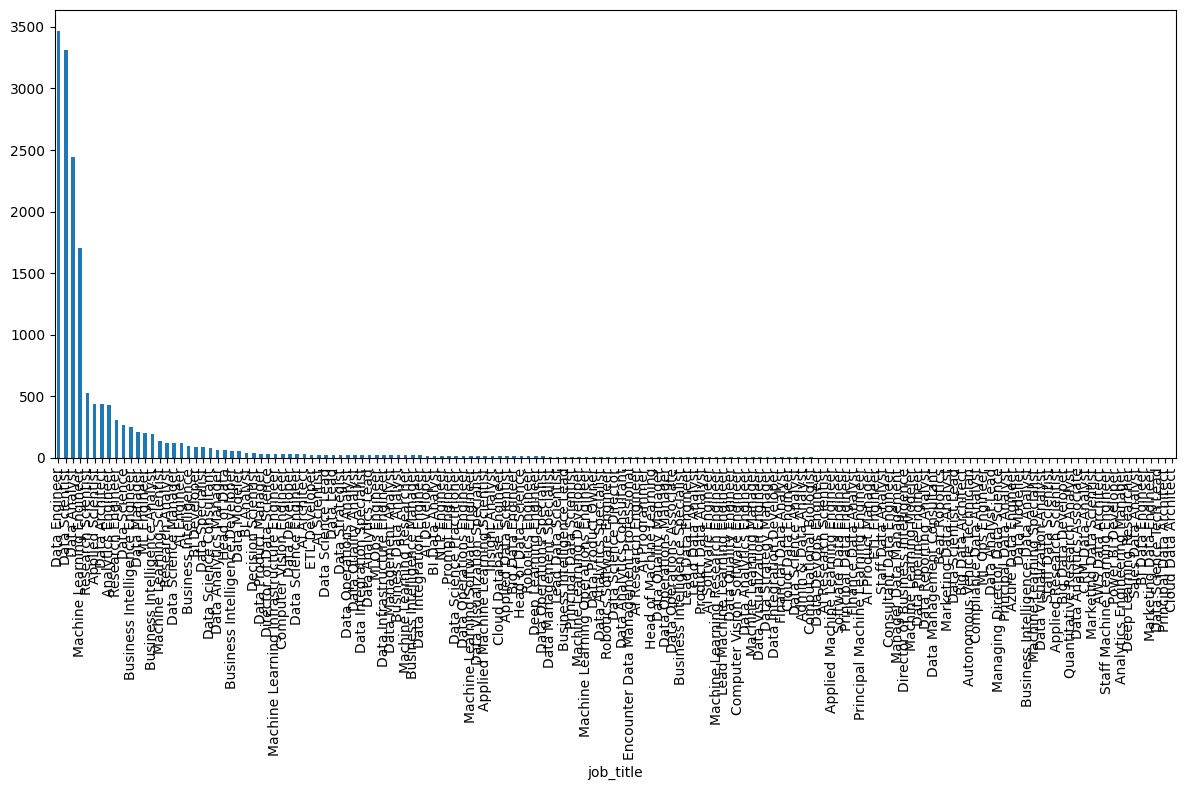

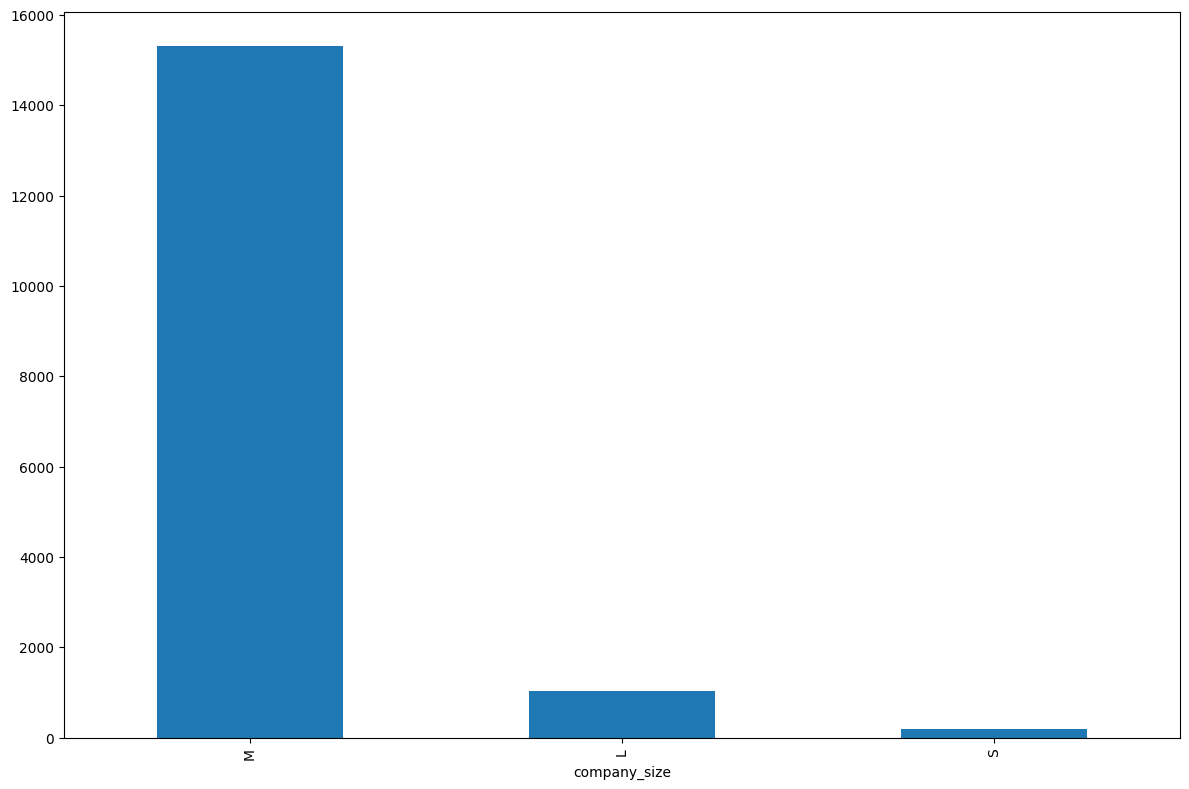

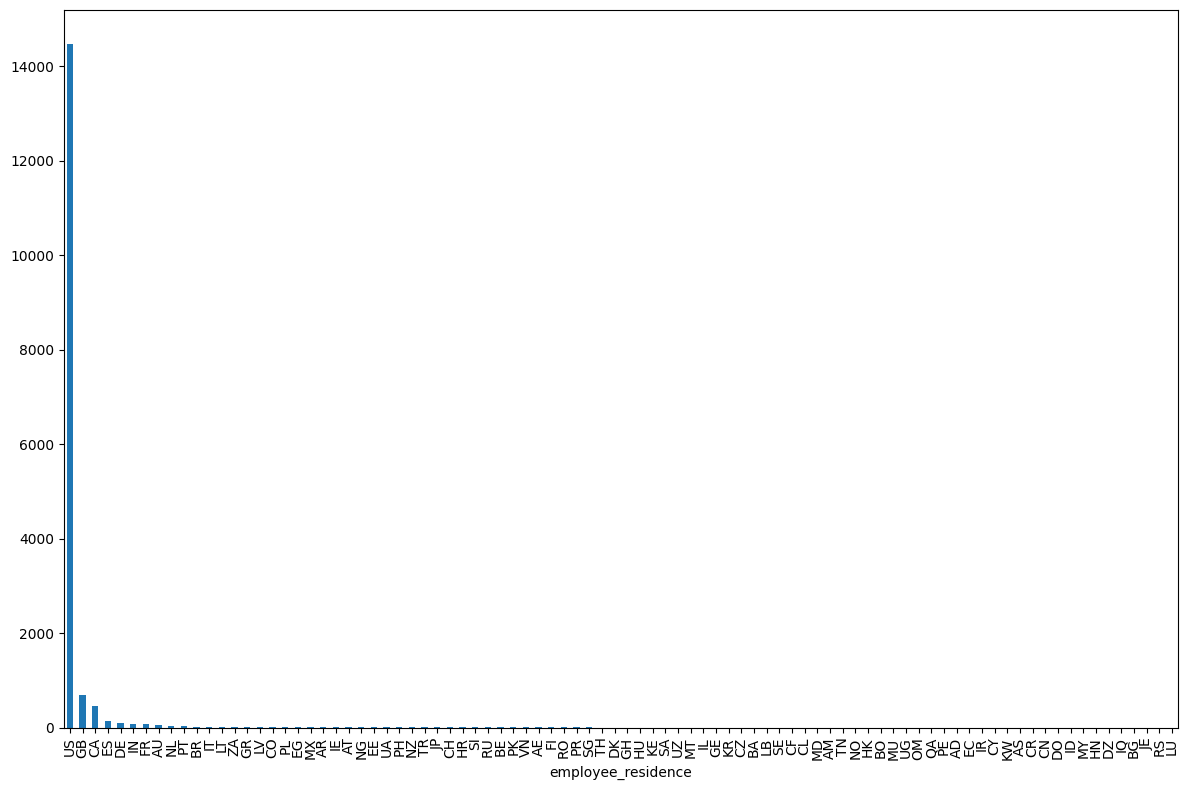

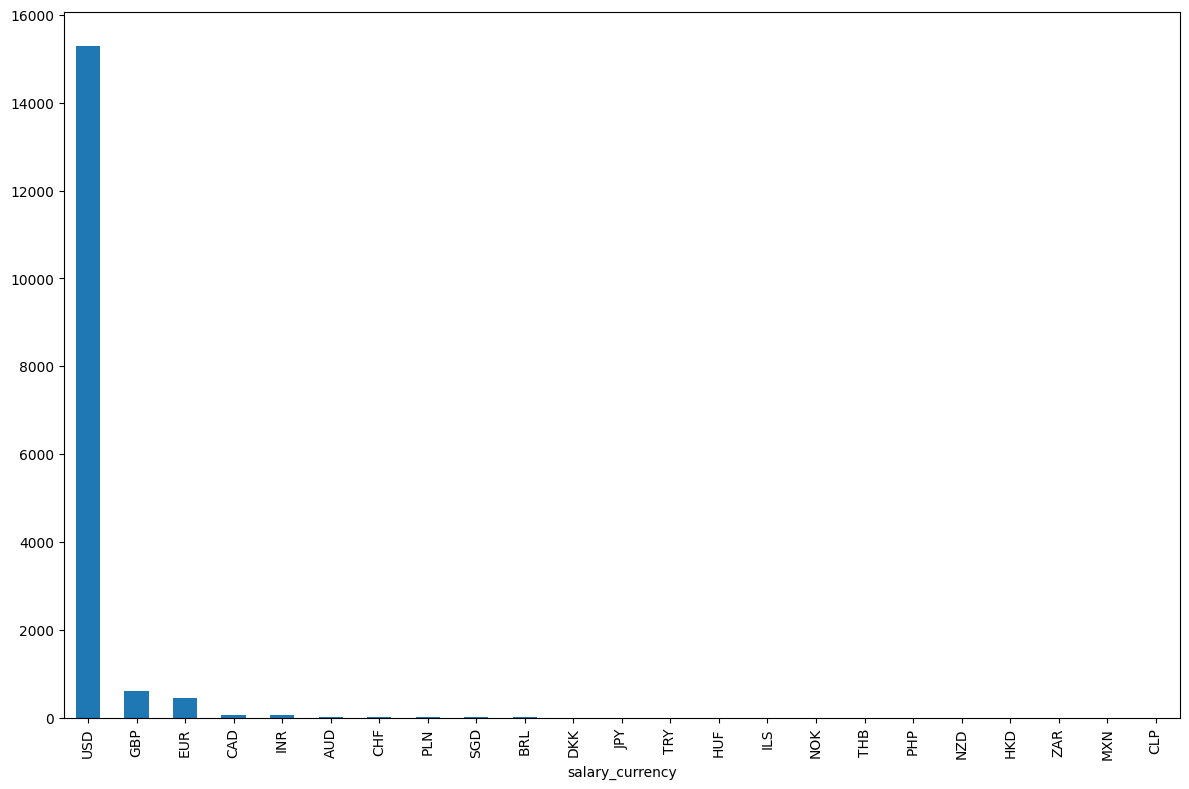

In [146]:
for c in categorical_col:
  plt.figure(figsize=(12,8))
  df[c].value_counts().plot(kind='bar')
  plt.tight_layout()
  plt.show()

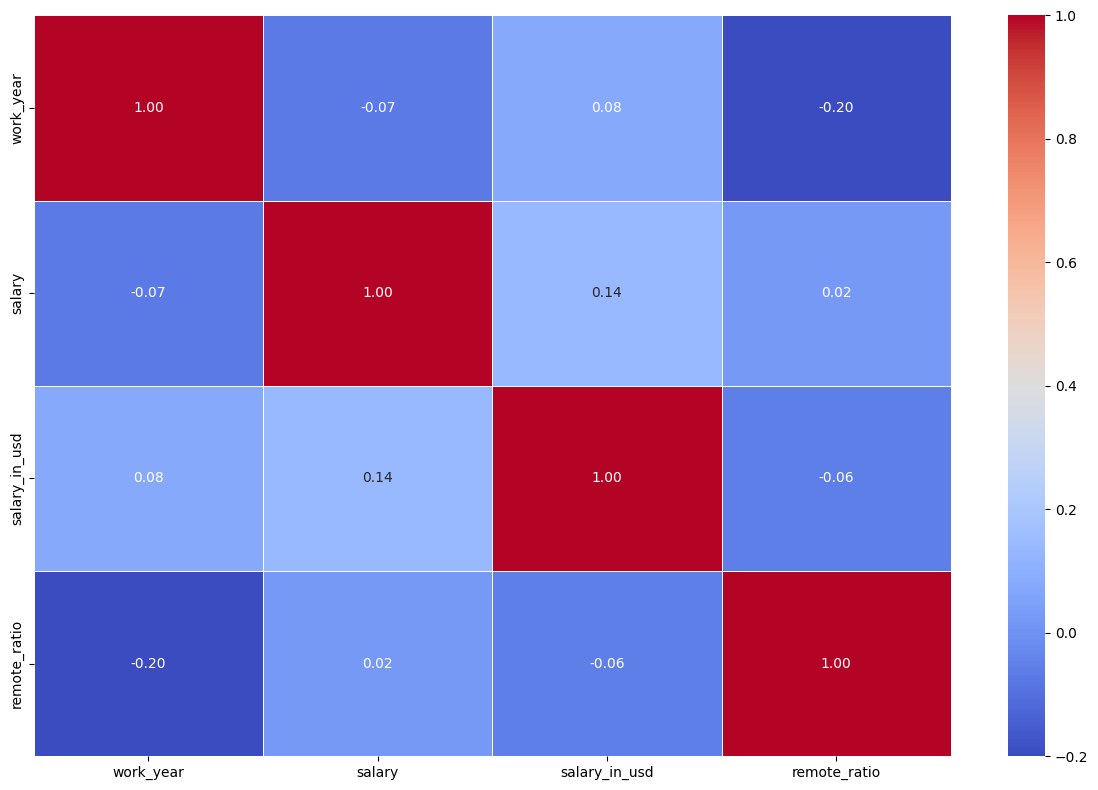

In [147]:
corr_matrix = df[numerical_col].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.tight_layout()
plt.show()

In [148]:
for c in categorical_col:
  print(c,df[c].unique())

experience_level ['SE' 'MI' 'EN' 'EX']
employment_type ['FT' 'CT' 'PT' 'FL']
job_title ['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Manager' 'Data Architect' 'Data Operations Manager'
 'Research Scientist' 'Data Science Manager'
 'Business Intelligence Engineer' 'Business Intelligence' 'Data Modeler'
 'Data Integration Specialist' 'Data Product Manager'
 'Data Visualization Specialist' 'Data Science' 'Data Specialist'
 'Business Intelligence Lead' 'Research Analyst'
 'Business Intelligence Analyst' 'AI Software Engineer'
 'Machine Learning Scientist' 'Data Science Engineer'
 'Machine Learning Operations Engineer' 'Analytics Engineer'
 'Data Management Analyst' 'Encounter Data Management Professional'
 'Data Analytics Specialist' 'Head of Data' 'Data Analytics Lead'
 'Research Engineer' 'AI Scientist' 'Business Intelligence Developer'
 'Machine Learning Developer' 'Data Management Spec

drop = remote_ratio,

In [149]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M


In [150]:
df = df.drop(['salary_in_usd','salary_currency','employee_residence'],axis=1)

In [151]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,0,US,M
1,2024,SE,FT,AI Engineer,92118,0,US,M
2,2024,SE,FT,Data Engineer,130500,0,US,M
3,2024,SE,FT,Data Engineer,96000,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,0,US,M


In [152]:
categorical_cols =['experience_level','employment_type','job_title','company_location']

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['company_size'] = le.fit_transform(df['company_size'])


In [154]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,0,US,1
1,2024,SE,FT,AI Engineer,92118,0,US,1


In [155]:
df = pd.get_dummies(df,columns=categorical_cols,dtype=int)

In [156]:
df.head(2)

,work_year,salary,remote_ratio,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_SA,company_location_SE,company_location_SG,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA
0,2024,202730,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2024,92118,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [157]:
target_col='salary'

In [164]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

numerical_cols = ['work_year', 'salary']
robust_scaler = RobustScaler()
df[numerical_cols] = robust_scaler.fit_transform(df[numerical_cols])


In [167]:
df.head(2)

,work_year,salary,remote_ratio,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_SA,company_location_SE,company_location_SG,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA
0,1.0,0.708475,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,-0.586186,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
